In [1]:
import sys
import torch
from pathlib import Path
import matplotlib.pyplot as plt
from torch import device as torch_device
sys.path.append("../scripts")
from visualize import *
from models import ResNet
from train import train_CNN, cross_val_CNN
from loaders import loader_polar, loader_vec

from os import listdir
import numpy as np

device = torch_device('cuda:1')
folder = Path('/home/leonov/Baikal/Gr_big_data/exps/Vector/Batch_sizes')
! nvidia-smi

Thu Jan 19 14:51:30 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.29.05    Driver Version: 495.29.05    CUDA Version: 11.5     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:21:00.0 Off |                  N/A |
| 32%   61C    P2   299W / 350W |  20179MiB / 24268MiB |     99%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  On   | 00000000:44:00.0 Off |                  N/A |
|  0%   

In [ ]:
'''
for batch_size in [2**i for i in range(5,15)][::-1]:
    print(batch_size)
    train_loader = loader_vec(Batch_size = batch_size, regime = "train")
    test_loader = loader_vec(Batch_size = batch_size, regime = "test")
    
    model = ResNet(input_size = 5, output_size  = 3, device = device)
    
    opt = torch.optim.Adam(model.parameters(), lr = learn_rate)
    sch_Exp = torch.optim.lr_scheduler.ExponentialLR(opt, gamma = 0.95)

    train_loss, test_loss  = train_CNN(model= model, scheduler = sch_Exp, optimizer = opt, device = device,
                        train_loader = train_loader, test_loader = test_loader,
                        exp_path = folder / f"Vector_BS_{batch_size}_{epochs}_epochs",
                        epochs_num = epochs, criterion=torch.nn.L1Loss())                        
'''

# Batch size exps Vector

Parameters amount is  369076
Parameters amount is  369076
Parameters amount is  369076
Parameters amount is  369076
Parameters amount is  369076
Parameters amount is  369076
Parameters amount is  369076
Parameters amount is  369076
Parameters amount is  369076


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


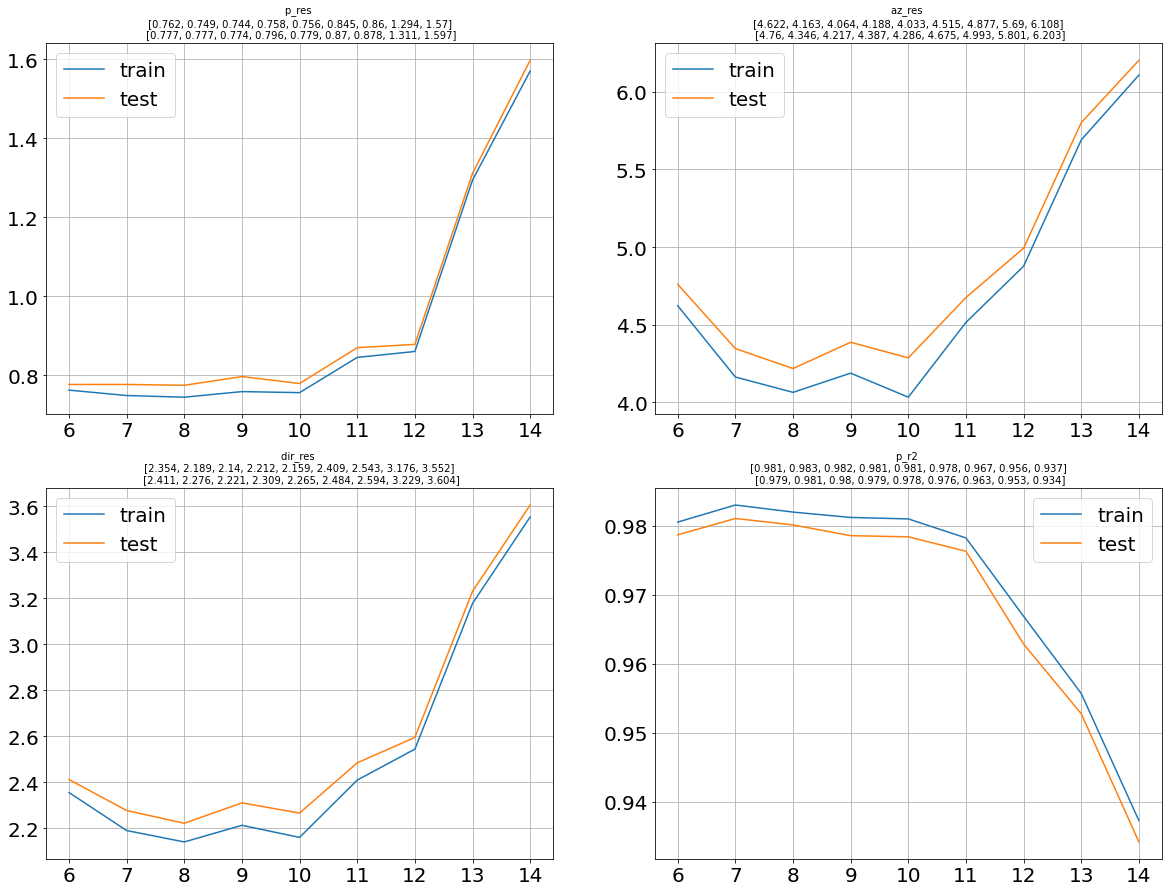

In [12]:
bss = [2**i for i in range(6,15)]
train_p_res, train_az_res, train_dir_res, train_p_r2 = [],[],[],[]
test_p_res, test_az_res, test_dir_res, test_p_r2 = [],[],[],[]
for batch_size in bss:
    model = ResNet(input_size = 5, output_size  = 3, device = device)
    train_loader = loader_vec(Batch_size = batch_size, regime = "train")
    test_loader = loader_vec(Batch_size = batch_size, regime = "test")
    model_path = f'/home/leonov/Baikal/Gr_big_data/exps/Vector/Batch_sizes/Vector_BS_{batch_size}_40_epochs/States/model'
    model.load_state_dict(torch.load(model_path))
    train_record = CNN_Info(model, train_loader, regime = "train", path = None, show = False)
    test_record = CNN_Info(model, test_loader, regime = "test", path = None, show = False)
    
    train_p_res.append(train_record['polar_res']); test_p_res.append(test_record['polar_res'])
    train_az_res.append(train_record['azimut_res']); test_az_res.append(test_record['azimut_res'])
    train_dir_res.append(train_record['direction_res']); test_dir_res.append(test_record['direction_res'])
    train_p_r2.append(train_record['polar_r2']); test_p_r2.append(test_record['polar_r2'])
######################################## train #######################################################    
powers = list(range(6,15))

plt.figure(figsize = (20,15))
plt.subplot(2,2,1); plt.legend(fontsize = 20)
plt.plot(powers, train_p_res, label = 'train'); plt.plot(powers, test_p_res, label = 'test')
plt.xticks(powers); plt.legend() 
plt.title(f'p_res \n {[round(v,3) for v in train_p_res]} \n {[round(v,3) for v in test_p_res]}',  fontsize = 10)
plt.grid()

plt.subplot(2,2,2); plt.legend(fontsize = 20)
plt.plot(powers, train_az_res, label = 'train'); plt.plot(powers, test_az_res, label = 'test')
plt.xticks(powers); plt.legend() 
plt.title(f'az_res \n {[round(v,3) for v in train_az_res]} \n {[round(v,3) for v in test_az_res]}', fontsize = 10)
plt.grid()

plt.subplot(2,2,3); plt.legend(fontsize = 20)
plt.plot(powers, train_dir_res, label = 'train'); plt.plot(powers, test_dir_res, label = 'test')
plt.xticks(powers); plt.legend() 
plt.title(f'dir_res \n {[round(v,3) for v in train_dir_res]} \n {[round(v,3) for v in test_dir_res]}', fontsize = 10)
plt.grid()

plt.subplot(2,2,4); plt.legend(fontsize = 20)
plt.plot(powers, train_p_r2, label = 'train'); plt.plot(powers, test_p_r2, label = 'test')
plt.xticks(powers); plt.legend() 
plt.title(f'p_r2 \n {[round(v,3) for v in train_p_r2]} \n {[round(v,3) for v in test_p_r2]}', fontsize = 10)
plt.grid()

# Batch size  exps polar

Parameters amount is  368915
Parameters amount is  368915
Parameters amount is  368915
Parameters amount is  368915
Parameters amount is  368915
Parameters amount is  368915
Parameters amount is  368915
Parameters amount is  368915
Parameters amount is  368915


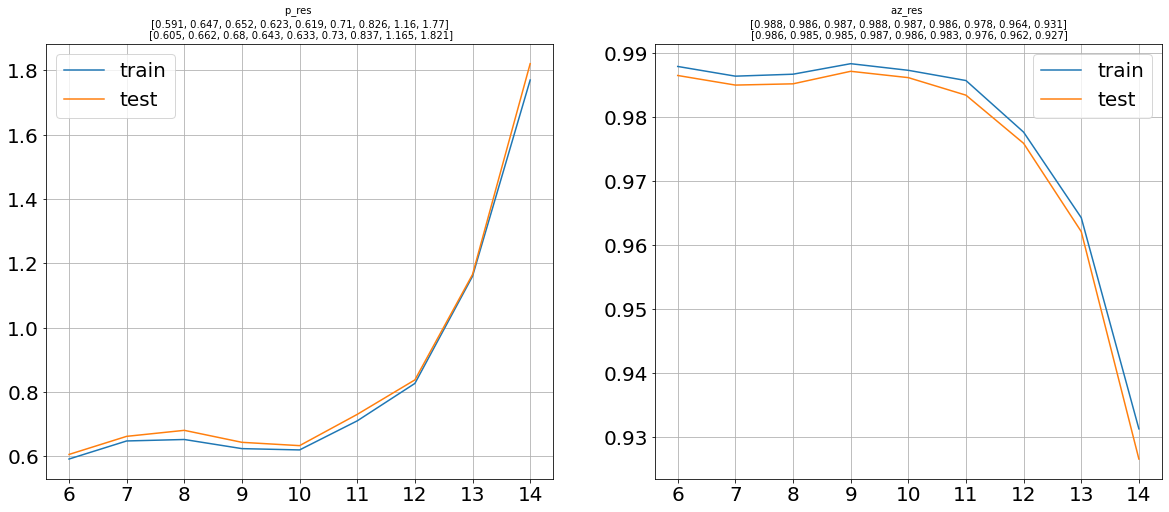

In [13]:
bss = [2**i for i in range(6,15)]
batch_size = 1024
train_p_res, train_p_r2 = [],[]
test_p_res, test_p_r2 = [],[]
for batch_size in bss:
    model = ResNet(input_size = 5, output_size  = 2, device = device)
    train_loader = loader_polar(Batch_size = batch_size, regime = "train")
    test_loader = loader_polar(Batch_size = batch_size, regime = "test")
    model_path = f'/home/leonov/Baikal/Gr_big_data/exps/Polar/Batch_sizes/Polar_BS_{batch_size}_40_epochs/States/model'
    model.load_state_dict(torch.load(model_path))
    train_record = CNN_Info(model, train_loader, regime = "train", path = None, show = False)
    test_record = CNN_Info(model, test_loader, regime = "test", path = None, show = False)
    
    train_p_res.append(train_record['polar_res']); test_p_res.append(test_record['polar_res'])
    train_p_r2.append(train_record['polar_r2']); test_p_r2.append(test_record['polar_r2'])
    
powers = list(range(6,15))
plt.figure(figsize = (20,8))

plt.subplot(1,2,1)
plt.plot(powers, train_p_res, label = 'train'); plt.plot(powers, test_p_res, label = 'test')
plt.xticks(powers); plt.legend() 
plt.title(f'p_res \n {[round(v,3) for v in train_p_res]} \n {[round(v,3) for v in test_p_res]}',  fontsize = 10)
plt.grid()

plt.subplot(1,2,2)
plt.plot(powers, train_p_r2, label = 'train'); plt.plot(powers, test_p_r2, label = 'test')
plt.xticks(powers); plt.legend() 
plt.title(f'az_res \n {[round(v,3) for v in train_p_r2]} \n {[round(v,3) for v in test_p_r2]}', fontsize = 10)
plt.grid()

# Vec

In [ ]:
epochs = 90
batch_size = 1024
learn_rate = 3e-3

train_loader = loader_vec(Batch_size = batch_size, regime = "train")
model = ResNet(input_size = 5, output_size  = 3, device = device)
cross_val_CNN(model = model, device = device, criterion=torch.nn.L1Loss(),
                  train_loader = train_loader, folds = 5, epochs_num = epochs, learn_rate = learn_rate,
                  exp_path = f'/home/leonov/Baikal/Gr_big_data/exps/Vector/CV_ep{epochs}_bs1024')

Parameters amount is  369076


 78%|███████▊  | 70/90 [1:22:34<24:15, 72.78s/it]

## polar

In [ ]:
epochs = 90
batch_size = 1024
train_loader = loader_polar(Batch_size = batch_size, regime = "train")

model = ResNet(input_size = 5, output_size  = 2, device = device)

cross_val_CNN(model = model, device = device, criterion=torch.nn.L1Loss(),
                  train_loader = train_loader, folds = 5, epochs_num = epochs, learn_rate = learn_rate,
                  exp_path = f'/home/leonov/Baikal/Gr_big_data/exps/Polar/CV_ep{epochs}_bs1024')

Parameters amount is  368915


 64%|██████▍   | 58/90 [59:09<32:36, 61.15s/it]  

# look at it

## Polar

(0.0095, 0.0135)

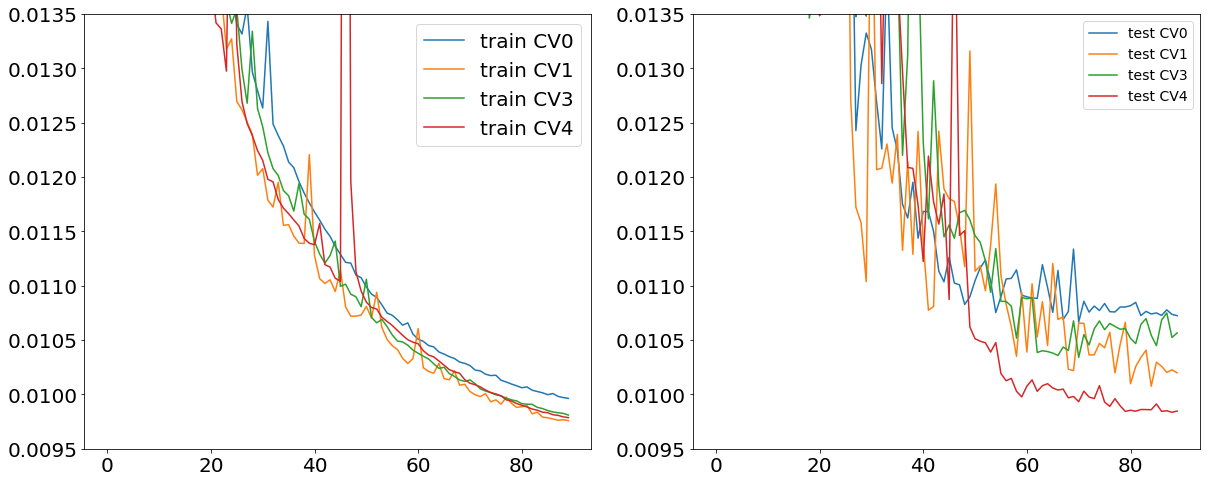

In [18]:
fold = '/home/leonov/Baikal/Gr_big_data/exps/Polar/CV_ep90_bs1024'
s = 0
plt.figure(figsize = (20,8))
for i in [0,1,3,4]:
    p = f'{fold}/CV{i}/Plots'
    plt.subplot(1,2,1)
    plt.plot(np.load(f'{p}/train_loss.json.npy')[s:], label = f'train CV{i}')
    plt.subplot(1,2,2)
    plt.plot(np.load(f'{p}/test_loss.json.npy')[s:], label = f'test CV{i}')
plt.legend(fontsize = 14)
plt.ylim(0.0095, 0.0135)
plt.subplot(1,2,1); plt.legend()
plt.ylim(0.0095, 0.0135)

## vector

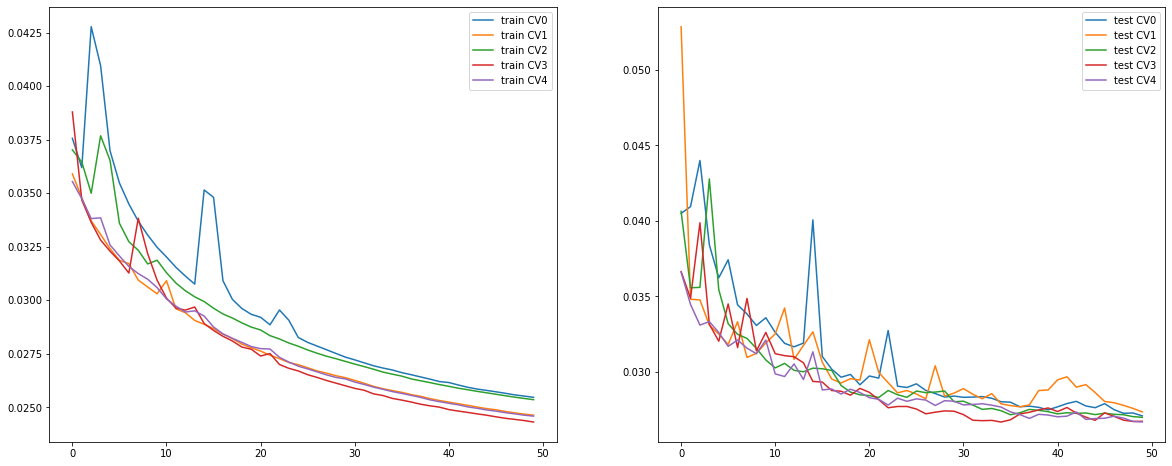

In [20]:
fold = '/home/leonov/Baikal/Gr_big_data/exps/Vector/CV_ep60_bs1024'
plt.figure(figsize = (20,8))
for i in [0,1,2,3,4]:
    p = f'{fold}/CV{i}/Plots'
    plt.subplot(1,2,1)
    plt.plot(np.load(f'{p}/train_loss.json.npy')[10:], label = f'train CV{i}')
    plt.subplot(1,2,2)
    plt.plot(np.load(f'{p}/test_loss.json.npy')[10:], label = f'test CV{i}')
plt.legend()
plt.subplot(1,2,1); plt.legend()

FileNotFoundError: [Errno 2] No such file or directory: '/home/leonov/Baikal/Gr_big_data/exps/Vector/CV_ep90_bs1024/CV0/Plots/train_loss.json.npy'

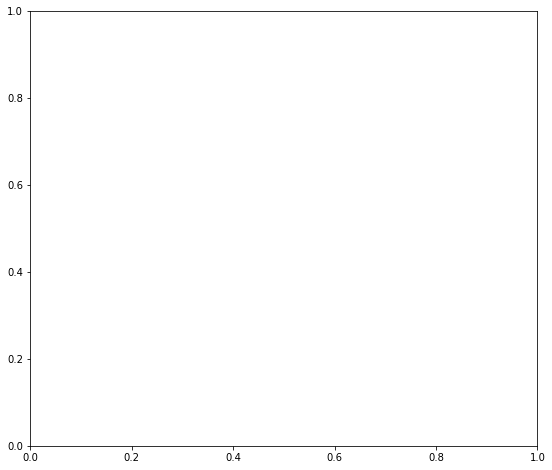

In [9]:
fold = '/home/leonov/Baikal/Gr_big_data/exps/Vector/CV_ep90_bs1024'
plt.figure(figsize = (20,8))
s = 60
for i in [0,1,2,3,4]:
    p = f'{fold}/CV{i}/Plots'
    plt.subplot(1,2,1)
    plt.plot(np.load(f'{p}/train_loss.json.npy')[s:], label = f'train CV{i}')
    plt.subplot(1,2,2)
    plt.plot(np.load(f'{p}/test_loss.json.npy')[s:], label = f'test CV{i}')
plt.legend(fontsize = 20)
plt.ylim(0.0095, 0.0135)
plt.subplot(1,2,1); plt.legend()
plt.ylim(0.0095, 0.0135)